<a href="https://colab.research.google.com/github/flow4u/public/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19

Data Source: https://github.com/CSSEGISandData/COVID-19
 
 

To run this notebook: **CTRL + F9**

## Import Modules & Data



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import ipywidgets as widgets2
from google.colab import widgets

In [0]:
data_sets = ('Confirmed', 'Recovered', 'Deaths')
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-"

for set in data_sets:
  df_temp = pd.read_csv(base_url+set+'.csv')
  df_temp = df_temp.drop(['Lat', 'Long'],axis=1)
  del df_temp['Province/State']
  # not all date columns have the same format, some are mm/d/yy, others mm/dd/yy
  # this will convert first to date, then back to string
  for col in df_temp.columns:
    try:
      col1 = col[:len(col)-2]+'20'+col[-2:]
      col_new = datetime.strptime(col1,'%m/%d/%Y')
      col_new = datetime.strftime(col_new, '%Y-%m-%d')
      df_temp.rename(columns={col: col_new}, inplace=True)
    except:
      pass
  df_temp = df_temp.groupby(['Country/Region']).sum()
  df_temp['Status'] = set
  try:
    df = df.append(df_temp, sort=False)
  except:
    df=df_temp

df = df.reindex(sorted(df.columns), axis=1)  

## Filters

When a change is made, use **CTRL + F10**

In [0]:
europe = ['Austria', 'Belgium', 'Croatia', 'Finland', 'Ireland', 'France',
          'Germany','Italy', 'Norway', 'Romania','Greece', 'Spain', 'Sweden',
          'Switzerland', 'North Macedonia', 'Denmark', 'UK', 'Netherlands',
          'San Marino', 'Iceland', 'Luxembourg', 'Monaco', 'North Ireland',
          'Czech Republic', 'Andorra', 'Portugal', 'Gibraltar', 'Hungary',
          'Liechtenstein', 'Bosnia and Herzegovina', 'Slovenia','Poland',
          'Lithuania','Georgia','Estonia', 'Latvia', 'Russia', 'Belarus',
          'Armenia', 'Azerbaijan', 'Ukraine']

asia = ['Cambodia', 'Mainland China', 'Hong Kong', 'India', ' Azerbaijan', 
        'Japan', 'Macau', 'Malaysia', 'Macau', 'Nepal', 'Philippines', 
        'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan', 'Thailand',
        'Vietnam', 'Indonesia', 'Afghanistan', 'Bahrain','Kuwait','Oman',
        'Iran', 'Iraq','Pakistan', 'Israel','Jordan', 'Lebanon', 'Qatar',
        'Saudi Arabia', 'United Arab Emirates', 'Palestine']

north_america = ['US', 'Canada', 'Mexico']

south_america = ['Brazil', 'Dominican Republic', 'Saint Barthelemy',
                 'Argentina', 'Chile', 'Ecuador', 'Faroe Islands']

africa = ['Nigeria', 'Morocco', 'Senegal', 'Algeria', 'Egypt', 'Tunisia',
          'South Africa']

oceania = ['Australia', 'New Zealand']

others = ['Others']

continents = {'europe': europe, 'asia': asia, 'north_america': north_america,
              'south_america': south_america,'africa': africa,
              'oceania': oceania, 'others':others}

all_countries = others
all_countries.extend(europe)
all_countries.extend(asia)
all_countries.extend(africa)
all_countries.extend(south_america)
all_countries.extend(north_america)
all_countries.extend(oceania)

missing_countries = 'Missing: '
for t in df.index.unique():
  if all_countries.count(t) == 0:
    missing_countries = missing_countries + ", '" + t + "'"


# Check

In [0]:
#@title
if missing_countries != 'Missing: ':
  print(missing_countries)
  print('')
  print('The above countries must be added to the appropiate filters in the code')
  print('The code for the filters can be found above this output')

In [6]:
#@title
# from ipywidgets import ToggleButton, interactive, interact
w={}
w2=''
items=[]
button_temp=[]
tab_contents = list(continents.keys())
tb = widgets.TabBar(tab_contents)

for i, tab_content in enumerate(tab_contents):
  items.append([])
  with tb.output_to(i, select=(i < 0)):

    # print(exec(continent))
    countries = sorted(continents[tab_content])
    button_temp = [widgets2.ToggleButton(value=False, description=country, button_style='') for country in countries]
    items[i].append(button_temp)

    for item in items[i]:
      for sub_item in item:
        button_name = sub_item.description.replace(' ','')
        w[button_name]= sub_item
        if(len(w2)>0):
          w2 = w2 + ', '
        w2 = w2 + button_name

    # def test(aa):
    #   for a in aa.split(', '):
    #     print(w[a].description + ': ' + str(w[a].value))

    # code_i = 'def f('+w2+ '):test(w2)'# print('+w2+')'
    # exec(code_i)

    # out = widgets.interactive_output(f, w)

    layout=widgets2.Layout(max_width='100%',
                          grid_template_columns='repeat(auto-fill,130px'
                          )

    ui = widgets2.GridBox(item, layout=layout)

    display(ui) #, out)
    # output = interactive_plot.children[-1]
    # output.layout.height = '350px'
    # interactive_plot



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridBox(children=(ToggleButton(value=False, description='Andorra'), ToggleButton(value=False, description='Arm…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridBox(children=(ToggleButton(value=False, description=' Azerbaijan'), ToggleButton(value=False, description=…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridBox(children=(ToggleButton(value=False, description='Canada'), ToggleButton(value=False, description='Mexi…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridBox(children=(ToggleButton(value=False, description='Argentina'), ToggleButton(value=False, description='B…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridBox(children=(ToggleButton(value=False, description='Algeria'), ToggleButton(value=False, description='Egy…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridBox(children=(ToggleButton(value=False, description='Australia'), ToggleButton(value=False, description='N…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridBox(children=(ToggleButton(value=False, description=' Azerbaijan'), ToggleButton(value=False, description=…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

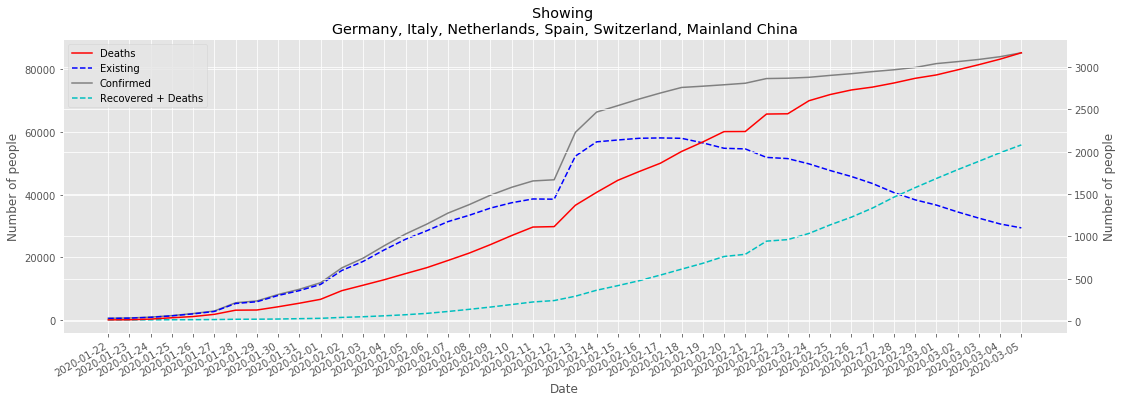

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

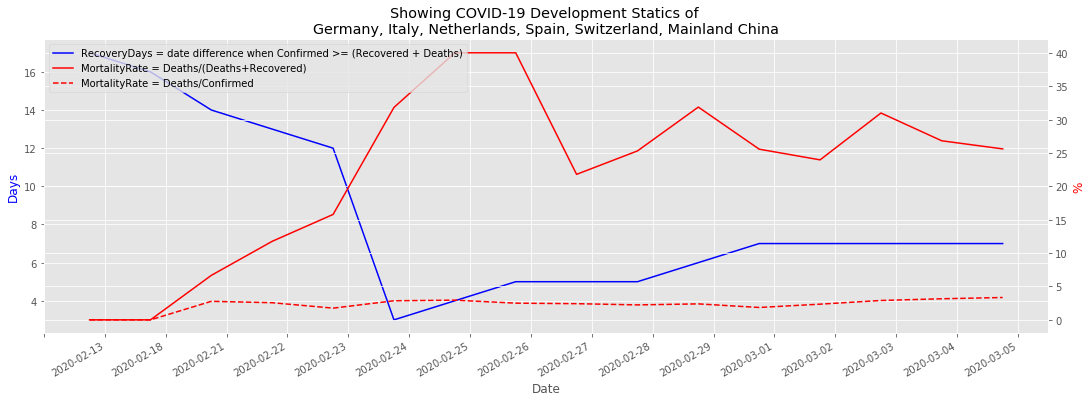

<IPython.core.display.Javascript object>

In [54]:
#@title
countries_list = []
for item in items:
  for sub_item in item:
    for subsub_item in sub_item:
      # print(subsub_item)
      if (subsub_item.value):
        countries_list.append(subsub_item.description)

country_selection = ''
for t, c in enumerate(countries_list):
  if (t%8==0):
    country_selection += '\n' + c
  else:
    country_selection += ', ' + c

tab_contents = ['Deaths, Existing, Confirmed, and Recovered + Deaths', 'Estimated Recovery Days & Mortality Rate']
tb = widgets.TabBar(tab_contents)

# creating the different dataframes
df2 = df[df.index.isin(countries_list)]
df_status = df2.groupby(['Status']).sum()
df_plot = df_status.T.reset_index()
df_plot['Existing'] = df_plot['Confirmed'] - df_plot['Deaths'] - df_plot['Recovered']
df_plot['Recovered + Deaths'] = df_plot['Recovered'] +df_plot['Deaths']

date_list=[]
days_list=[]
mortality_rate_list1=[]
mortality_rate_list2=[]
value_temp = -1
value2_temp = -1
value3_temp = -1
for index, row in df_temp2.iterrows():
  if row['Recovered'] > 0:
    value_lookup = row['Recovered']
    value2_lookup = row['Confirmed']
    value3_lookup = row['Deaths']
    mortality_rate1 = value3_lookup / (value_lookup+value3_lookup) * 100
    mortality_rate2 = value3_lookup / (value2_lookup) * 100
    # mortality_rate_list.append(mortality_rate)
    if(value_temp != value_lookup or value2_temp != value2_lookup or value3_temp != value3_lookup):
      for index2, row2 in df_temp2.iterrows():
        if row2['Confirmed'] >= (value_lookup+value3_lookup):
          date1 = datetime.strptime(row['index'], '%Y-%m-%d')
          date2 = datetime.strptime(row2['index'], '%Y-%m-%d')
          recovery_time = date1-date2
          recovery_time_date = datetime.strftime(date1, '%Y-%m-%d')
          recovery_days = recovery_time.days
          date_list.append(recovery_time_date)
          days_list.append(recovery_days)
          mortality_rate_list1.append(mortality_rate1)
          mortality_rate_list2.append(mortality_rate2)
          break
      value_temp = value_lookup
      value2_temp = value2_lookup
      value3_temp = value3_lookup


df_recovery_time = pd.DataFrame(days_list, index=date_list, columns=['RecoveryDays'])
df_mortality_rate1 = pd.DataFrame(mortality_rate_list1, index=date_list, columns=['MortalityRate'])
df_mortality_rate2 = pd.DataFrame(mortality_rate_list2, index=date_list, columns=['MortalityRate'])


for i, tab_content in enumerate(tab_contents):
  items.append([])

with tb.output_to(0, select=(0)):
  plt.style.use('ggplot')
  x = df_plot['index'] 
  label1 = 'Confirmed'
  label2 = 'Deaths'
  label3 = 'Existing'
  label4 = 'Recovered + Deaths'
  y1 = df_plot[label1]
  y2 = df_plot[label2]
  y3 = df_plot[label3]
  y4 = df_plot[label4]

  fig, ax1 = plt.subplots(figsize=(18,6))

  ax2 = ax1.twinx()
  fig.autofmt_xdate()
  start, end = ax1.get_xlim()
  stepsize = 1
  ax1.xaxis.set_ticks(np.arange(start, end, stepsize))

  title = 'Showing ' + country_selection
  line1, = ax1.plot(x, y1, color='grey', label = label1)
  line2, = ax1.plot(x, y3, 'b--', label = label3)
  line3, = ax2.plot(x, y2, 'r-', label = label2)
  line4, = ax1.plot(x, y4, 'c--', label = label4)

  ax1.set_xlabel('Date')
  ax1.set_ylabel('Number of people')
  ax2.set_ylabel('Number of people')

  plt.legend(handles=[line3, line2, line1, line4], loc='upper left')
  plt.title(title)

  plt.show()

with tb.output_to(1, select=(0)):
  plt.style.use('ggplot')
  y11 = 'RecoveryDays'
  y11a = y11 + ' = date difference when Confirmed >= (Recovered + Deaths)'
  y21 = 'MortalityRate'
  y21a = y21 + ' = Deaths/(Deaths+Recovered)'
  y21b = y21 + ' = Deaths/Confirmed'
  x = df_recovery_time.index
  y1 = df_recovery_time[y11]
  y2 = df_mortality_rate1[y21]
  y3 = df_mortality_rate2[y21]
  fig, ax1 = plt.subplots(figsize=(18,6))

  ax2 = ax1.twinx()
  marker1 = 'o'
  marker2 = 'x'
  marker3= '+'
  if df_recovery_time.shape[0] > 1:
    marker1 = ''
    marker2 = ''
    marker3 = ''
  line1, = ax1.plot(x, y1, 'b-', label=y11a, marker=marker1)
  line2, = ax2.plot(x, y2, 'r-', label=y21a, marker=marker2)
  line3, = ax2.plot(x, y3, 'r--', label=y21b, marker=marker3)

  fig.autofmt_xdate()

  # ax1.set_ylim(0,55000)
  start, end = ax1.get_xlim()
  # stepsize = 5
  ax1.xaxis.set_ticks(np.arange(start, end, stepsize))

  ax1.set_xlabel('Date')
  ax1.set_ylabel('Days', color='b')
  ax2.set_ylabel('%', color='r')

  title = 'Showing COVID-19 Development Statics of ' + country_selection
  plt.legend(handles=[line1,line2,line3], loc='upper left')
  plt.title(title)

  plt.show()